In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import dash
from jupyter_dash import JupyterDash
from dash import dcc, html  
from dash.dependencies import Input, Output

df= pd.read_csv('Earthquake_with_continents.csv')

print(df.isnull().sum())
df['date']=pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df.head()

Unnamed: 0            0
id                    0
magnitude             0
type                  0
title                 0
date                  0
time                  0
updated               0
url                   0
detailUrl             0
felt                  0
cdi                   0
mmi                   0
alert              4188
status                0
tsunami               0
sig                   0
net                   0
code                  0
ids                   0
sources               0
types                 0
nst                   0
dmin                  0
rms                   0
gap                   0
magType               0
geometryType          0
depth                 0
latitude              0
longitude             0
place                89
distanceKM           55
placeOnly            89
location             89
continent             0
country             949
subnational        1043
city               3855
locality              4
postcode           2503
what3words      

,Unnamed: 0,id,magnitude,type,title,date,time,updated,url,detailUrl,...,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails,month
0,0,at00rt29jk,6.2,earthquake,"M 6.2 - 211 km SW of Port McNeill, Canada",2023-04-13 15:54:56,1681401296000,1681402393396,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,...,Ocean/Unknown,NaN,NaN,NaN,Etc/GMT+9,NaN,tinkering.retail.exiting,-540,"[{'id': '86035', 'wikidataId': 'Q12353254', 'n...",4
1,1,at00rt29jk,6.2,earthquake,"M 6.2 - 211 km SW of Port McNeill, Canada",2023-04-13 15:54:56,1681401296000,1681402393396,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,...,Ocean/Unknown,NaN,NaN,NaN,Etc/GMT+9,NaN,tinkering.retail.exiting,-540,"[{'id': '86035', 'wikidataId': 'Q12353254', 'n...",4
2,2,us6000k42y,6.0,earthquake,"M 6.0 - 238 km SW of Port McNeill, Canada",2023-04-13 15:54:53,1681401293815,1681481900040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,...,Ocean/Unknown,NaN,NaN,NaN,Etc/GMT+9,NaN,multipliers.locating.gushing,-540,"[{'id': '86035', 'wikidataId': 'Q12353254', 'n...",4
3,3,us6000k3z2,5.4,earthquake,M 5.4 - Owen Fracture Zone region,2023-04-13 03:24:08,1681356248627,1681433567440,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,...,Ocean/Unknown,NaN,NaN,NaN,Etc/GMT-4,NaN,beams.inactivation.prepacked,240,"[{'id': '621', 'wikidataId': 'Q58705', 'name':...",4
4,4,us6000k3z1,5.2,earthquake,"M 5.2 - Nicobar Islands, India region",2023-04-13 03:21:19,1681356079365,1681432280040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,...,Ocean/Unknown,NaN,NaN,NaN,Etc/GMT-6,NaN,ejected.attainments.peruse,360,"[{'id': '428', 'wikidataId': 'Q47632', 'name':...",4


In [3]:
df = df[["magnitude","title","date","mmi","tsunami","sig","type","nst","rms","depth",
        "latitude","longitude","continent","month"]]

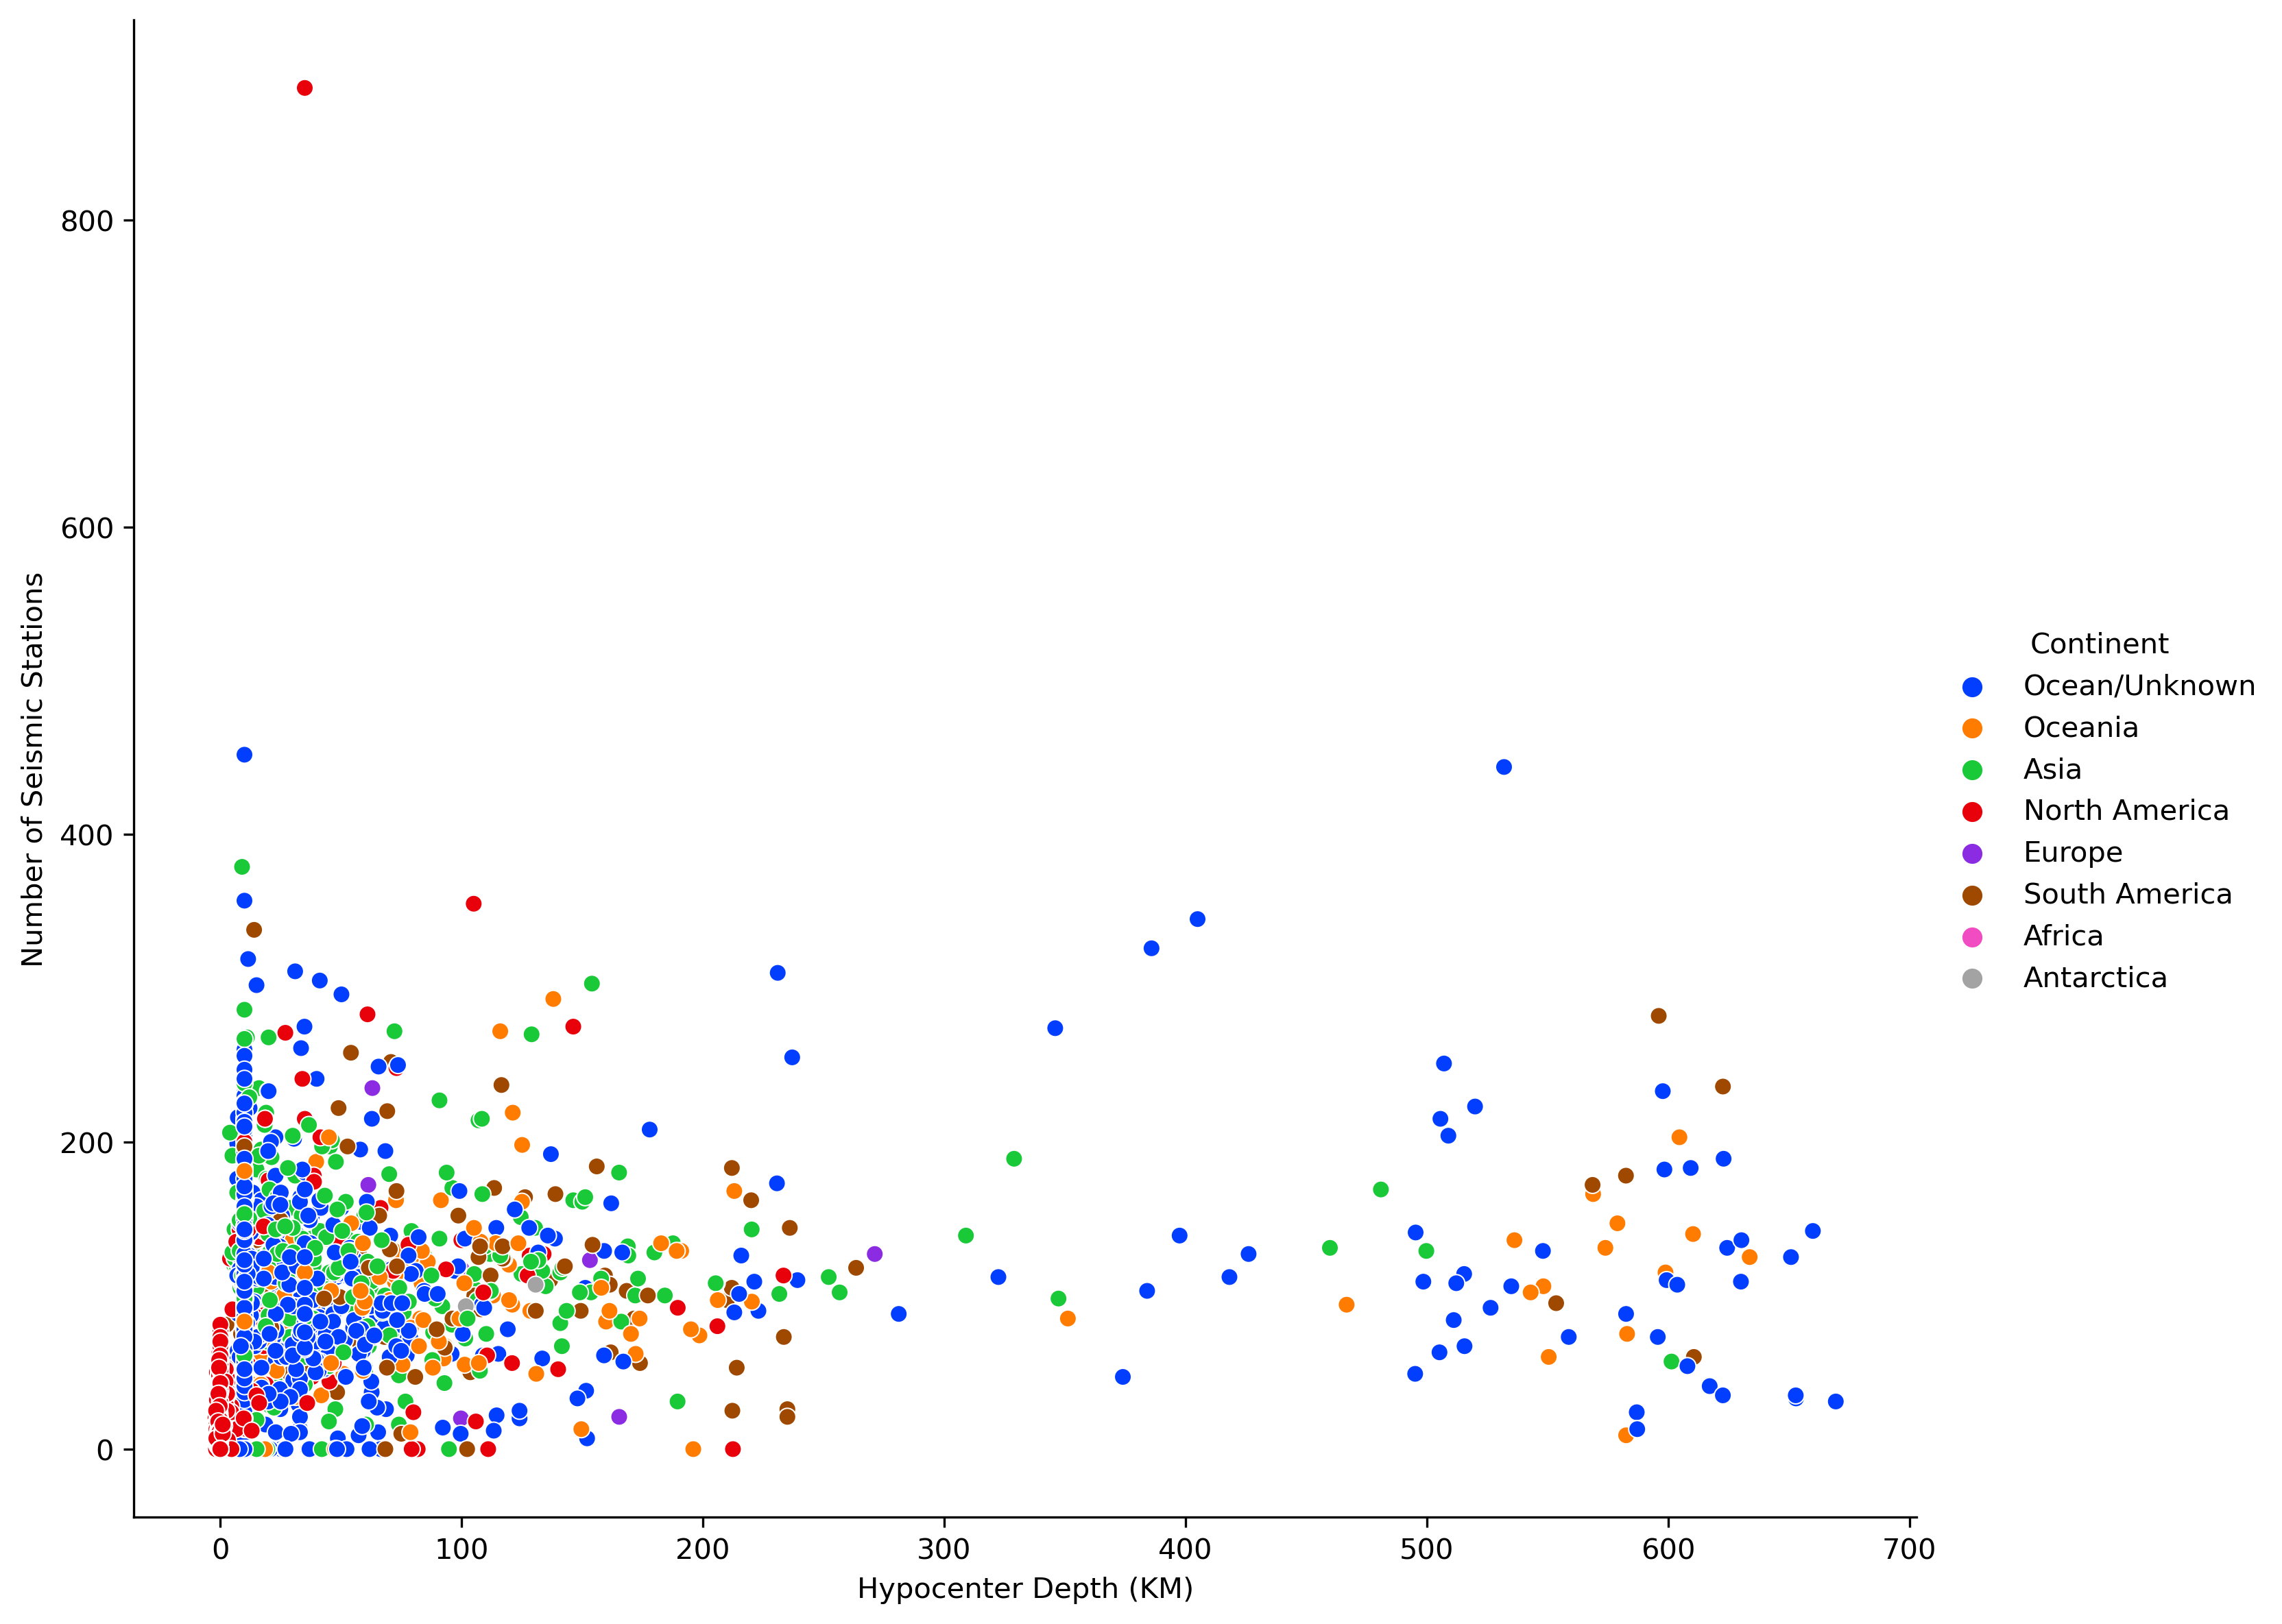

In [89]:
# Create a relplot that considers the hypocenter depth and the number of seismic stations that identified an event.
plt.rcParams["figure.dpi"] = 300
sns_plot=sns.relplot(data=df,x="depth", y="nst", hue='continent', palette = "bright",height=8, aspect=1.2)
plt.xlabel('Hypocenter Depth (KM)')
plt.ylabel('Number of Seismic Stations')
sns_plot._legend.set_title("Continent")
sns_plot.figure.savefig("rel_plot.png",dpi=300)
plt.show()

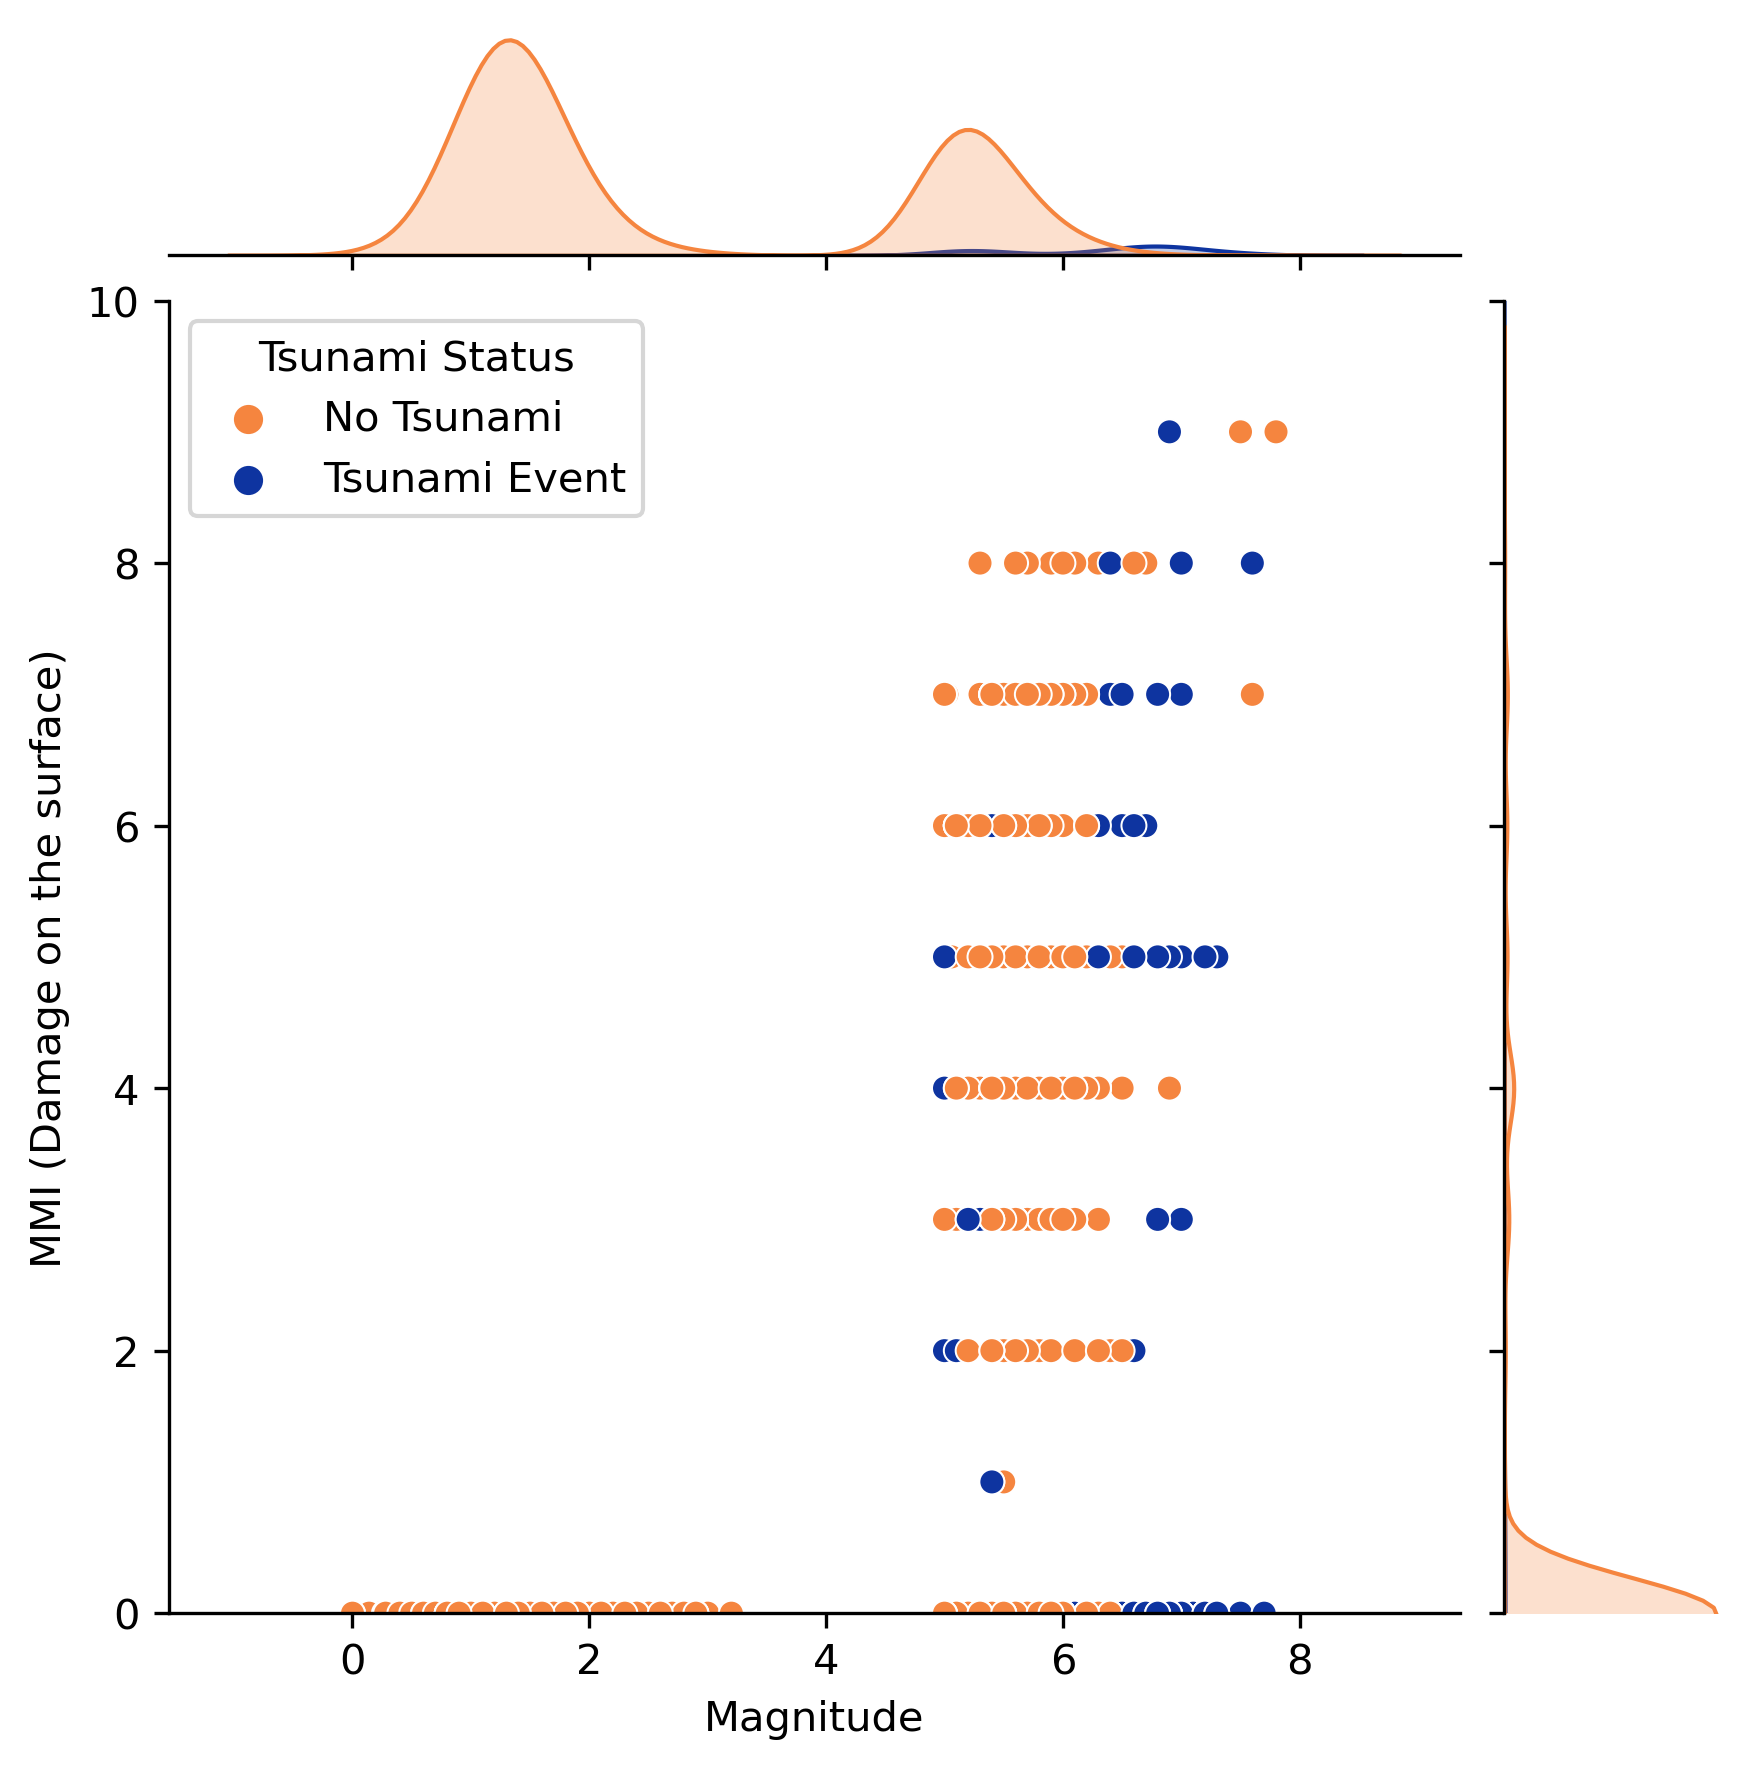

In [4]:
# Graph showing the correlation between the magnitude, the MMI, and the presence of a tsunami. 
# The distribution of the values is also shown.

plt.rcParams["figure.dpi"] = 300
tsunami_pal = {0:"#F5853F",1:"#0E34A0"}
sns_plot = sns.jointplot(data=df, x= 'magnitude', y='mmi',hue='tsunami',sizes='felt',palette=tsunami_pal,height=6)
plt.xlabel('Magnitude')
plt.ylabel('MMI (Damage on the surface)')
sns_plot.ax_joint.set_ylim([0, 10])
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_labels = ["No Tsunami", "Tsunami Event"]
ax.legend(handles=handles, labels=new_labels, title="Tsunami Status")
#sns_plot.figure.savefig("joint_plot.png",dpi=300)
plt.show()

In [3]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app_bar = JupyterDash(__name__, external_stylesheets = external_stylesheets)

colorscale = {'earthquake': '#FF595E','explosion':'#FFCA3A','quarry blast':'#8AC926','ice quake':'#1982C4'}

app.layout = html.Div([
		html.Div([
				html.Div([
						html.P( "Select a month:", className = "control_label"),
						dcc.Dropdown(id = "select_month",
							            options =[
                                            {'label':'January','value':1},
                                            {'label':'February','value':2},
                                            {'label':'March','value':3},
                                            {'label':'April','value':4},
                                            {'label':'May','value':5},
                                            {'label':'June','value':6},
                                            {'label':'July','value':7},
                                            {'label':'August','value':8},
                                            {'label':'September','value':9},
                                            {'label':'October','value':10},
                                            {'label':'November','value':11},
                                            {'label':'December','value':12},
                                        ],
							            value = 4,
							            className = "dcc_control"),
					],
					className = "pretty_container four columns",
					id = "cross-filter-options",
				),
				html.Div([dcc.Graph(id = "bar_graph")],
                            id="countGraphContainer",
                            className = "pretty_container eight columns",
				),
			],
			className = "row flex-display",
		)])

In [4]:
app_bar.layout = html.Div([
    html.Div([
    html.P( "Select a month:", className = "control_label"),
    dcc.Dropdown(
        id="select_month",
        options=[
            {'label': 'January', 'value': 1},
            {'label': 'February', 'value': 2},
            {'label': 'March', 'value': 3},
            {'label': 'April', 'value': 4},
            {'label': 'May', 'value': 5},
            {'label': 'June', 'value': 6},
            {'label': 'July', 'value': 7},
            {'label': 'August', 'value': 8},
            {'label': 'September', 'value': 9},
            {'label': 'October', 'value': 10},
            {'label': 'November', 'value': 11},
            {'label': 'December', 'value': 12},
        ],
        value=1,
        className="dcc_control"
    )
    ]),
    html.Div([
    dcc.Graph(id='bar_graph')]),
    
    html.Div([
        html.Div([
    dcc.Dropdown(options=['earthquake', 'quarry blast', 'explosion','ice quake'], 
                 value=['earthquake','ice quake'], id='type_select', multi=True),
    html.Div(id='dd-output-container')
]),
				html.Div(
                    [ dcc.Graph(id = 'box_plot1')],
				),
				html.Div(
					[ dcc.Graph(id = 'box_plot2')],
				),
            html.Div(
					[ dcc.Graph(id = 'box_plot3')],
				),
			],
			className="row flex-display",
		),
	],
	id="mainContainer",
	style={"display": "flex", "flex-direction": "column"})

In [5]:
@app_bar.callback(Output("bar_graph","figure"),Input("select_month","value"))

def bar_graph(month_value):
    temp = df[df['month'] == int(month_value)]
    order = pd.DataFrame(temp['type'].value_counts(sort=True,ascending=False))
    order.reset_index(inplace=True)
    fig = px.bar(order, y="index", x="type",category_orders=dict(type=order['index']),color="index",color_discrete_map=colorscale)
    fig.update_layout(xaxis_title="Count", yaxis_title="Seismic Event Type", legend_title="Seismic Event Type")
    fig.update_layout(title_text="Number of events per type")
    return fig

In [6]:
@app_bar.callback(Output("box_plot1","figure"),[Input("select_month","value"),Input("type_select","value")])

def box_magnitude(month_value,type_values):
    temp = df[(df['month'] == int(month_value))&(df['type'].isin(type_values))]
    fig = px.box(temp,x="type", y="magnitude", points="all",hover_data=["title"],color="type",color_discrete_map=colorscale)
    fig.update_layout(yaxis_title="Magnitude", xaxis_title="Seismic Event Type", legend_title="Seismic Event Type")
    return fig

In [7]:
@app_bar.callback(Output("box_plot2","figure"),[Input("select_month","value"),Input("type_select","value")])

def box_sig(month_value,type_values):
    temp = df[(df['month'] == int(month_value))&(df['type'].isin(type_values))]
    fig = px.box(temp, x="type", y="sig", points="all",hover_data=["title"],color="type",color_discrete_map=colorscale)
    fig.update_layout(yaxis_title="Significance of the event", xaxis_title="Seismic Event Type", legend_title="Seismic Event Type")
    return fig

In [10]:
@app_bar.callback(Output("box_plot3","figure"),[Input("select_month","value"),Input("type_select","value")])

def box_depth(month_value,type_values):
    temp = df[(df['month'] == int(month_value))&(df['type'].isin(type_values))]
    fig = px.box(temp,x="type", y="depth", points="all",hover_data=["title"],color="type",color_discrete_map=colorscale)
    fig.update_layout(yaxis_title="Hypocentrer Depth (KM)", xaxis_title="Seismic Event Type", legend_title="Seismic Event Type")
    return fig

In [11]:
app_bar.run_server(mode='inline',port=8080)

In [139]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app_map = JupyterDash(__name__, external_stylesheets = external_stylesheets)

list_continents = list(df['continent'].unique())

In [140]:
app_map.layout = html.Div([
    html.Div([
    html.P( "Select a continent:", className = "control_label"),
    dcc.RadioItems(
        id="select_continent",
        options=list_continents,
        value="Europe",
        className="dcc_control",inline=True
    )
    ]),
    html.Div([
    dcc.Graph(id='map_graph')]),
    
    html.Div([
				html.Div(
                    [ dcc.Graph(id = 'scatter_graph')]
				),
				html.Div(
					[ dcc.Graph(id = 'pie_graph')]
				),
			],
			className="row flex-display",
		),
	],
	id="mainContainer",
	style={"display": "flex", "flex-direction": "column"})

In [141]:
@app_map.callback(Output("map_graph","figure"),Input("select_continent","value"))
def map_events (continent): 
    temp = df[df['continent']==continent]
    px.set_mapbox_access_token(open(".mapbox_token").read())
    fig = px.scatter_mapbox(temp, lat="latitude", lon="longitude", color="magnitude", size ="magnitude",
                      color_continuous_scale=px.colors.sequential.Redor, size_max = 5,zoom=2,hover_name="title",hover_data=['date'])
    fig.update_traces(hovertemplate = "<b>%{hovertext}</b><br><br>Date: %{customdata[0]}<extra></extra>")
    return fig

In [142]:
@app_map.callback(Output("scatter_graph","figure"),Input("select_continent","value"))

def scatter_graph(continent):
    temp = df[(df['continent']==continent)&(df['type']=="earthquake")]
    fig = px.scatter(temp, x='sig', y='rms', color='depth',color_continuous_scale=px.colors.sequential.Emrld,hover_name="title",hover_data=['date'])
    fig.update_layout(plot_bgcolor='#E7ECEF',yaxis_title="Root Mean Square (Seismic Waves)", xaxis_title="Significance of the event")
    fig.update_traces(hovertemplate = "<b>%{hovertext}</b><br><br>Date: %{customdata[0]}<extra></extra>")
    fig.update_coloraxes(colorbar_title="Depth")
    return fig


In [143]:
@app_map.callback(Output("pie_graph","figure"),Input("select_continent","value"))

def pie_graph(continent):
    temp = df[(df['continent']==continent)&(df['type']=="earthquake")]
    tsunami_pal = {"No Tsunami":"#F5853F","Tsunami Event":"#0E34A0"}
    counts = pd.DataFrame(temp['tsunami'].value_counts()).reset_index()
    counts.replace({0:"No Tsunami",1:"Tsunami Event"},inplace=True)
    fig = px.pie(counts, values='tsunami', names='index', color_discrete_map=tsunami_pal,color='index')
    fig.update_traces(hovertemplate = "<b>%{label}</b><br>Count: %{value}<br><br>")
    fig.update_layout(title_text="Number of tsunamis caused by the earthquakes")
    return fig

In [144]:
app_map.run_server(mode='inline',port=8050)

In [128]:
# Showing the location of each of the activities. 
#Gonna go ahead and only plot the quakes that have a magnitude of over 4
import folium

# Create a map of the USA
m = folium.Map(tiles="Stamen Terrain")

df2=df[df.magnitude>=4.0]

# Add markers for the airports
for i in range(len(df2)):
    lon = df2.longitude[i]
    lat = df2.latitude[i]
    name = df2.type[i]
    mag=df2.magnitude[i]
    for j in range(len(df2.type.unique())):
        cols=['blue','red','green','purple']
        if name==df.type.unique()[j]:
            folium.Marker([lat, lon], popup=[name,mag],icon=folium.Icon(color=cols[j])).add_to(m)

In [5]:
# define the buttons to zoom into each continent
buttons = [
    {'name': 'Africa', 'location': [0, 20], 'zoom': 4},
    {'name': 'Asia', 'location': [30, 100], 'zoom': 4},
    {'name': 'Europe', 'location': [50, 10], 'zoom': 4},
    {'name': 'North America', 'location': [40, -100], 'zoom': 3},
    {'name': 'South America', 'location': [-15, -60], 'zoom': 4},
    {'name': 'Australia', 'location': [-25, 135], 'zoom': 4},
]

button_template = """
    <button onclick="myFunction('{name}', {lat}, {lng}, {zoom})">Zoom to {name}</button>
"""
button_layer = folium.FeatureGroup(name='Continents')

# Add the buttons to the button layer
for button in buttons:
    html = button_template.format(name=button['name'], lat=button['location'][0], lng=button['location'][1], zoom=button['zoom'])
    iframe = folium.IFrame(html=html, width=200, height=50)
    popup = folium.Popup(iframe, max_width=2650)
    marker = folium.Marker(location=button['location'], popup=popup)
    marker.add_to(button_layer)

# Add the button layer to the map
button_layer.add_to(m)

# Add a click listener to the map that zooms to the continent
callback = """
    function myFunction(name, lat, lng, zoom) {
        var map = window.map;
        map.setView([lat, lng], zoom);
    };
"""
folium.GeoJson(
    data={'type': 'FeatureCollection', 'features': []},
    style_function=lambda feature: {'fillColor': 'white'},
    highlight_function=lambda feature: {'weight': 3},
    control=False,
    smooth_factor=0,
    tooltip=None,
    name='Click to zoom',
    show=False,
).add_to(m)
m.get_root().add_child(folium.Element(callback))

# Add layer control
folium.LayerControl().add_to(m)

In [10]:
m

In [83]:
# If we were to do this with all the data, the image is extremely laggy
# And the only place that shows anything other than earthquakes
# Is america. 
#I have no idea how to make buttons that zoom... 